<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_5_1_PPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta é a parte referente ao item **5.1 - PCA Probabilístico**:

* Por favor, veja esse arquivo online em: https://colab.research.google.com/drive/1luBRh4dewKW1q3UzkcvlPT3N4XjeR3_X?usp=sharing
* Caso queira ver a parte referente ao item **5.2 - Inferência Variacional**, acesse https://colab.research.google.com/drive/13I_ttK224N7y7kguzunbaGhbhXALzxvW?usp=sharing


In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_style("dark")

np.random.seed(42)

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Universidade Federal do Ceará
* **Disciplina**: TÓPICOS AVANÇADOS EM APRENDIZAGEM DE MÁQUINA / TÓPICOS ESPECIAIS EM LÓGICA II
* **Código**: CK0255/CKP8377
* **Professores**: João Paulo P. Gomes / César Lincoln C. Mattos
* **Semestre**: 2020.2
* **Discente**: Paulo Mateus M. da Silva
* **Matrícula**: 486351
* **Curso**: Ciência da Computação

# Trabalho 5.1

> **Leia as instruções:**
> 
> * O trabalho é individual.
> * As simulações poderão ser realizadas em quaiquer linguagens de programação.
> * Para a avaliação do trabalho deverá ser submetido um arquivo pdf com texto e figuras referentes aos
resultados das simulações.
> * Para a avaliação do trabalho deverão ser enviados os códigos fonte.


## Item 1. Implemente um modelo de **Probabilistic Principal  Components Analysis (PPCA)** para os dígitos "5" do dataset MNIST. O procedimento de inferência deve ser feito via algoritmo Expectation-Maximization (EM).

* O download do dataset pode ser feito, por exemplo, via scikit-learn ou Keras;
* Avalie o seu modelo nas tarefas de reconstrução e de geração de novas amostras;
* Experimente com diferentes valores para a dimensão do espaço latente (e.g. 2, 10, 20).

### Organização do trabalho

O trabalho está organizado da seguinte forma:

**Conjunto de dados**

Contém os códigos refentes ao carregamento do conjunto de dados. Foram carregados os dados do MNIST de 64 atributos (imagens `8x8`)  para todos os números e os dados do MNIST_5 de 784 atributos (imagens `28x28`), que contém somente os dígitos $5$. O dataset MNIST de 64 atributos foi utilizado para realização de alguns testes, de modo a certificar a implementação corresponde com a apresentada pelo docente nas aulas. Já o MNIST_5 de 784 atributos, foi utilizado para a resolução da atividade proposta;

**Implementação dos Modelos**

Além de códigos utilitários, se encontram duas implementações para o PPCA: a primeira corresponde a primeira apresentada em aula e é exata; a segunda corresponde ao PPCA que utiliza Expectation Maximization, sendo esta a solicitada pelo trabalho.

**Detalhes sobre inicialização e treinamento dos modelos nos experimentos a seguir**

Contém informações relevantes sobre a inicialização e treinamento dos modelos. O treinamento dos modelos utilizados para a exibição dos gráficos das seções seguintes respeita o informado nesta seção.

**Gráficos**

São apresentados os gráficos solicitados nas questões, além de outros adicionais. Atente-se que no título dos gráficos conterá a informação de qual modelo a imagem refere-se.

* **Gráfico: Verossimilhança do espaço latente ($L=2$)**: São apresentadas as representações do espaço latente bidimensional ($L=2$) para o conjunto de dados completo com o MNIST de 64 atributos e para o conjunto de dados MNIST_5 de 784 atributos;
* **Gráfico: Média e bases principais para modelos treinados com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$**: Gráficos correspondentes à figura 12.6.a) do livro  _The Machine Learning: A Probabilistic Perspective_ de Kevin Murphy;
* **Gráfico: Estatísticas do trenamento do `PPCAEM` treinado com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$**: Estatísticas coletadas durante o treinamento, após cada iteração do Expectation Maximization;
* **Gráfico: Geração de amostras**: Geração de amostras solicitada no trabalho;
* **Gráfico: Reconstrução de imagens**: Reconstrução de imagens solicitada no trabalho.

**Agradecimentos**

Agradecimentos às pessoas que auxiliaram no desenvolvimento desse trabalho.

### Conjunto de dados

O código abaixo carrega o conjunto de dados para o `MNIST` 64 (cada padrão possui 64 atributos).

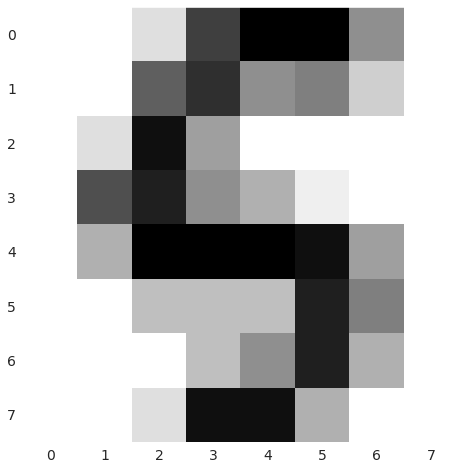

In [ ]:
from sklearn.datasets import load_digits

def carregar_dataset(numero):
    digits = carregar_dataset_completo()
    filtro = digits['target'] == numero
    return {
        'dados': digits['dados'][filtro],
        'imagens': digits['imagens'][filtro],
        'target': digits['target'][filtro]
    }

def carregar_dataset_completo():
    digits = load_digits(10)
    return {
        'dados': digits.data,
        'imagens': digits.images,
        'target': digits.target
    }

dataset_1 = carregar_dataset(numero=5)
plt.imshow(dataset_1['imagens'][123], cmap=plt.cm.gray_r, interpolation='none')

O código abaixo carrega o dataset para o `MNIST` 784 (cada padrão possui 784 atributos). Este será utilizado nos experimentos solicitados.

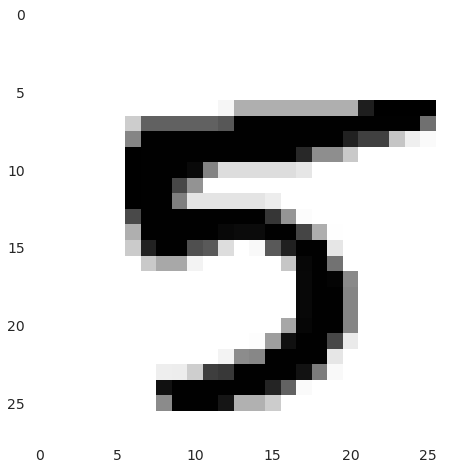

In [ ]:
from sklearn.datasets import fetch_openml

def carregar_dataset_784(numero):
    digits = carregar_dataset_completo_784()
    filtro = digits['target'] == numero
    return {
        'dados': digits['dados'][filtro],
        'imagens': digits['imagens'][filtro],
        'target': digits['target'][filtro]
    }

def carregar_dataset_completo_784():
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    return {
        'dados': X,
        'imagens': X.reshape((-1, 28, 28)),
        'target': y.astype(int)
    }

dataset_1 = carregar_dataset_784(numero=5)
plt.imshow(dataset_1['imagens'][123], cmap=plt.cm.gray_r, interpolation='none')

Definamos os conjuntos de dados utilizados neste documento:
* `X_completo`, `y_completo`: Conjunto de dados utilizados para verificar se a implementação "bate" com o apresentado nos slides do professor. Utiliza o MNIST de dimensão $D = 64$;
* `X`, `y`: Conjunto de dados MNIST_5 (MNIST composto somente dos dígitos `5`).
Este conjunto foi o utilizados nos experimentos, conforme solicitado. Utiliza o MNIST de dimensão $D = 28^2$.

Os `y_completo` e `y` serão utilizados apenas para rotulação das imagens em visualização da verossimilhança no espaço latente. Note ainda que `y` corresponde a um vetor composto somente por cincos (`5`).

In [ ]:
dataset_completo = carregar_dataset_completo()

X_completo = dataset_completo['dados'] / 255.0
y_completo = dataset_completo['target']

X = dataset_1['dados'] / 255.0
y = dataset_1['target']

### Implementação dos modelos

A seguir, encontram-se as implementações:
* Códigos utilitários
* PPCA:
  * `PPCABase` - Classe base para implementação de PPCAs
  * `PPCA` - PPCA Probabilístico. Este é o primeiro PPCA **probabilístico** apresentado nos slides;
  * `PPCAEM` - PPCA que utiliza Expectation-Maximization no treinamento. Este é o segundo PPCA **probabilístico** apresentado nos slides e foi o solicitado no trabalho.

#### Utilitários

Funções utilitárias para a realização de tarefas rotineiras.

In [ ]:
from scipy.stats import multivariate_normal


def Gaussianas(Means, Σ):
    """
    Gera várias várias gaussianas multivariadas de uma vez

    @param Means: Matriz de médias μ para cada k-ésimo _cluster_
    @param Σ: Matrizes de covariancia para cada k-ésimo _cluster_

    return Matriz N(X|μ_k, Σ_k) for i in K,
           onde μ_k = Means[k]
    """
    N_μ, _ = Means.shape

    gaussianas = []
    for i in range(N_μ):
        μ_i = Means[i, :]
        Σ_i = Σ[i, :, :]

        gaussianas.append(multivariate_normal(mean=μ_i.flatten(), cov=Σ_i, allow_singular=True))

    return gaussianas

In [ ]:
def autovalores_autovetores(X):
    """
    Obtenção de autovalores e autovetores via SVD
    """
    U, S, D = np.linalg.svd(X)
    λ = S.reshape((-1, 1))
    autovetores = U

    return λ, autovetores

#### `PPCABase` - Classe base para PPCAs

* @param $L$: Número de variáveis latentes

In [ ]:
from numpy.linalg import inv
from scipy.stats import multivariate_normal

class PPCABase:
    def __init__(self, L):
        """
        `PPCABase` - Classe base para PPCAs
 
        @param $L$: Número de variáveis latentes
        """
        self.L = L

        self.μ = None
        self.σ_square = None
        self.W = None
        self.M_inv = None

    def log_likelihood(self, X):
        """
        \sum log p(\boldsymbol{x}|W, \mu, \sigma)
        """
        N, D = X.shape
        I_D = np.identity(D)

        μ = self.μ
        Σ = self.W@self.W.T + self.σ_square*I_D

        pdfs = multivariate_normal(μ.flatten(), Σ).pdf(X)
        return pdfs.sum()

    def priori_espaco_latente(self):
        """
        p(\boldsymbol{z}) = \mathcal{\boldsymbol{z}|\boldsymbol{0}, \boldsymbol{I}_L}
        """
        I_L = np.identity(self.L)

        μ = np.zeros((self.L, 1))
        Σ = I_L

        return μ, Σ

    def posterioris(self, X):
        """
        Projeções lineares probabilísticas dos dados (para cada $x_i \in X$)
        p(z_i|x_i) = N(z_i|M^{-1}W.T(x-μ), σ^2 M^{-1})

        return (
            Média para cada x_i: M^{-1}W.T(x-μ),
            Matriz de covariância para cada x_i: σ^2 M^{-1}
        )
        """
        N, _ = X.shape

        μ = self.M_inv @ self.W.T @ (X - self.μ.T).T
        Σ = self.σ_square * self.M_inv

        Σ_multi = np.zeros((N, self.L, self.L)) + Σ
        
        return μ.T, Σ_multi

    def reconstrucao_probabilistica(self, z_i):
        """
        p(x_1|z_i) = N(v_i|W\_i + μ), σ^2 I

        return (
            Média para o $z_i$ indicado,
            Matriz de covariância para o $z_i$ indicado
        )
        """
        I_L = np.identity(self.L)

        μ = self.W@z_i + self.μ
        Σ = self.σ_square * I_L

        return μ, Σ

#### `PPCA` - PCA Probabilístico

* @param $L$: Número de variáveis latentes

In [ ]:
from numpy.linalg import eig


class PPCA(PPCABase):
    def fit(self, X):
        L = self.L
        N, D = X.shape
        I_L = np.identity(L)

        # Passo 1
        μ = X.mean(axis=0).reshape((-1, 1))
        S = np.cov(X, rowvar=False) # = 1/(N-1) * (X-μ.T)@(X-μ.T).T

        # Passo 2
        λ, autovetores = autovalores_autovetores(S)
        #λ, autovetores = eig(S)
        λ = λ.reshape((-1, 1))

        V = autovetores[:, :L]
        Λ = np.diag(λ[0:L].flatten())

        # Passo 3
        #  Murphy 12.62
        σ_square = 1/(D-L) * λ[L:].sum()
        #  Murphy 12.61 (R = I_L)
        Ŵ = V@(Λ - σ_square * I_L)**(1/2)
        #  Murphy 12.64 (F_hat = M̂)
        M̂ = Ŵ.T@Ŵ + σ_square * I_L

        self.σ_square = σ_square
        self.μ = μ
        self.W = Ŵ
        self.M_inv = inv(M̂)

#### `PPCAEM` - PPCA com aprendizagem via algoritmo EM

* @param $L$: Número de variáveis latentes

In [ ]:
from numpy.linalg import norm
from tqdm import tqdm


class PPCAEM(PPCABase):
    def __init__(self, L, W, σ_square):
        super().__init__(L)

        self.W = W
        self.σ_square = σ_square
        self.M_inv = None

    def fit(self, X, t_maximo=50, calcular_parametros=True):
        lls = np.zeros(t_maximo)
        μs = np.zeros(t_maximo)
        Ws = np.zeros(t_maximo)
        𝔼_zs = np.zeros(t_maximo)
        𝔼_zzTs = np.zeros(t_maximo)
        σ2s = np.zeros(t_maximo)

        # Passo 1
        self.μ = X.mean(axis=0).reshape((-1, 1))

        # Passo 2
        for t in tqdm(range(1, t_maximo+1)):
            # Passo 2.1
            𝔼_z, 𝔼_zzT, self.M_inv = self.expectation(X, self.μ, self.W, self.σ_square)
            # Passo 2.2
            self.W, self.σ_square = self.maximization(X, self.μ, 𝔼_z, 𝔼_zzT)

            if calcular_parametros:
                lls[t-1] = self.expected_log_likelihood(X, self.W, self.μ, self.σ_square, 𝔼_zzT, 𝔼_z)
                μs[t-1] = self.μ.sum()
                Ws[t-1] = self.W.sum()
                𝔼_zs[t-1] = 𝔼_z.sum()
                𝔼_zzTs[t-1] = 𝔼_zzT.sum()
                σ2s[t-1] = self.σ_square

        return lls, μs, Ws, σ2s, 𝔼_zs, 𝔼_zzTs

    def expectation(self, X, μ, W, σ_square):
        L = self.L
        I_L = np.identity(L)
        N, D = X.shape

        # Bishop 12.41
        M = W.T@W + σ_square * I_L
        M_inv = inv(M)

        𝔼_z = np.zeros((N, L))
        𝔼_zzT = np.zeros((N, L, L))
        lista = []
        for i in range(N):
            x_i = X[i].reshape((-1, 1))

            # Bishop 12.54
            𝔼_zi = M_inv@W.T @ (x_i - μ) #  Vetor coluna
            lista.append(𝔼_zi)
            𝔼_z[i] = 𝔼_zi.T              #  Vetor linha por conta da matriz
            # Bishop 12.55
            𝔼_zzT[i] = σ_square * M_inv + 𝔼_zi@𝔼_zi.T

        return 𝔼_z, 𝔼_zzT, M_inv

    def maximization(self, X, μ, 𝔼_z, 𝔼_zzT):
        N, D = X.shape
        norm_2 = lambda x: norm(x, 2)

        # Bishop 12.56
        W = (X - μ.T).T @ 𝔼_z \
          @ inv(np.sum(𝔼_zzT, axis=0))

        # Bishop 12.57
        σ_square_ = np.zeros((N, 1))
        for i in range(N):
            x_i = X[i].reshape((-1, 1))
            𝔼_zi = 𝔼_z[i].reshape((-1, 1))

            σ_square_[i] = norm_2(x_i - μ)**2 - 2*𝔼_zi.T@W.T@(x_i - μ) \
                         + np.trace(𝔼_zzT[i]@W.T@W)

        σ_square = 1/(N*D) * np.sum(σ_square_)
        return W, σ_square


    def expected_log_likelihood(self, X, W, μ, σ_square, 𝔼_zzT, 𝔼_z):
        """
        Negative Log Likelihood

        E log p(\boldsymbol{X}, \boldsymbol{Z}|W, \mu, \sigma)

        Página 49 do slide
        """
        N, D = X.shape
        norm_2 = lambda x: norm(x, 2)

        π = np.pi

        ll_ = np.zeros((N, 1))
        for i in range(N):
            x_i = X[i].reshape((-1, 1))
            𝔼_zi = 𝔼_z[i].reshape((-1, 1))

            ll_[i] = D/2 * np.log(2*π*σ_square) \
                    + L/2 * np.log(2*π) \
                    + 1/2 * np.trace(𝔼_zzT[i]) \
                    + 1/(2*σ_square) * norm_2(x_i - μ)**2 \
                    - 1/σ_square * 𝔼_zi.T@W.T@(x_i - μ) \
                    + 1/(2*σ_square) * np.trace(𝔼_zzT[i]@W.T@W)

        return - np.sum(ll_)

### Detalhes sobre inicialização e treinamento dos modelos nos experimentos a seguir

Para o modelo `PPCA`, somente a dimensão latente ($L$) foi informada. Já para o modelo `PPCAEM`, a inicialização ocorreu da seguinte forma, conforme sugestão do professor Dr. César Lincoln:

\begin{aligned}
 \boldsymbol{W}_{D \times L} &\in \mathcal{N}(0, 0.01), \\
 \sigma^2 &= \text{median}(\mathbb{V}[\mathbf{X}]).
\end{aligned}

Ainda referente ao `PPCAEM`, em todos os casos de treinamento, foram executadas 50 iterações do Expectation Maximization, sem outra condição de parada definida.

### Gráfico: Verossimilhança do espaço latente (L=2)

A seguir, encontram-se visualizações do espaço latente para modelos treinados com $L=2$.

#### Gráfico: Verossimilhança do espaço latente (L=2) para todo o conjunto de dados e MNIST com $D=64$

Para a visualização do espaço latente para todo o conjunto de dados, foi utilizado o conjunto de dados MNIST de dimensão $D=64$. Primeiro é apresentado para o `PPCA` e em seguida para o `PPCAEM`.

O código reference a implementação está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_verossimilhanca_espaco_latente(modelo, X, cores, ax=None, titulo="", visualizar_nuvem=True, regiao=(-3.0, 3.0)):
    resolucao = 100
    N, _ = X.shape

    x1 = np.linspace(*regiao, resolucao)
    x2 = np.linspace(*regiao, resolucao)
    X_grid = np.dstack(np.meshgrid(x1, x2))

    # Posterioris
    Means, Σ = modelo.posterioris(X)
    if visualizar_nuvem:
        gaussianas = Gaussianas(Means, Σ)

        # Nuvem da verissimilhança
        gaussianas = Gaussianas(Means, Σ)
        nuvens = np.zeros((N, resolucao, resolucao))

        for i, gaussiana in enumerate(gaussianas):
            nuvens[i] = gaussiana.pdf(X_grid)

        # Não funciona, não sei pq
        #nuvem = np.exp(np.log(nuvens).sum(axis=0))
        nuvem = nuvens.sum(axis=0)

    # Plot
    ax = plt.axes() if ax is None else ax
    
    if visualizar_nuvem:
        #cmap = sns.color_palette("Blues", as_cmap=True)
        cmap = 'viridis'
        ax.contourf(x1, x2, nuvem, levels=100, cmap=cmap)

    ax.scatter(Means[:, 0], Means[:, 1], c=cores)
    ax.set_title(titulo)

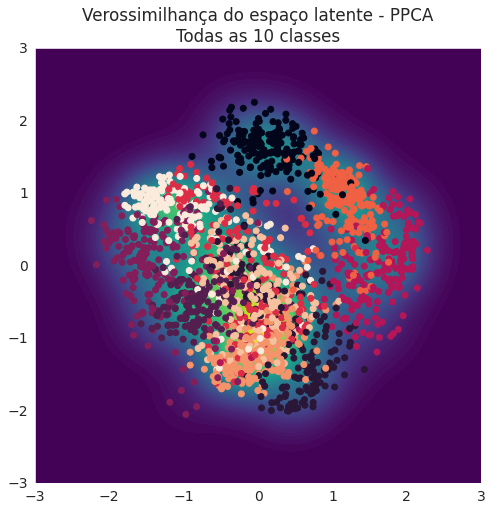

In [ ]:
ppca_2_completo = PPCA(L=2)
ppca_2_completo.fit(X_completo)

plot_verossimilhanca_espaco_latente(ppca_2_completo, X_completo, cores=y_completo, titulo="Verossimilhança do espaço latente - PPCA\nTodas as 10 classes")

100%|██████████| 50/50 [00:18<00:00,  2.67it/s]


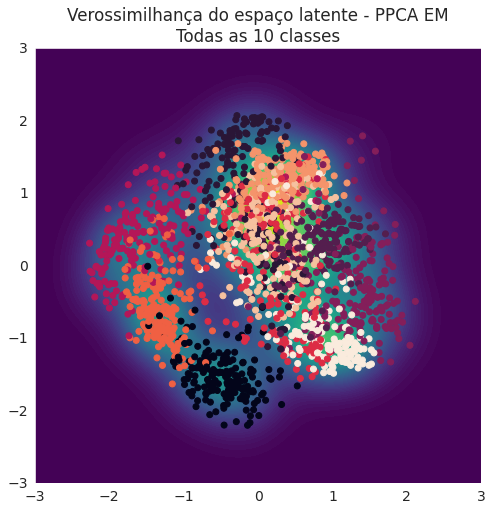

In [ ]:
_, D = X_completo.shape
L = 2

ppca_em_2_completo = PPCAEM(
    L=L,
    W=np.random.normal(0, 0.01, size=(D, L)),
    σ_square=np.median(X_completo.var(axis=0))
)
estatisticas_2_completo = ppca_em_2_completo.fit(X_completo)

plot_verossimilhanca_espaco_latente(ppca_em_2_completo, X_completo, cores=y_completo, titulo="Verossimilhança do espaço latente - PPCA EM\nTodas as 10 classes", visualizar_nuvem=True)

#### Gráfico: Verossimilhança do espaço latente (L=2) para somente os `dígitos = 5` do MNIST com $D=28^2$

O gráfico a seguir apresenta a visualização do espaço latente para o conjunto de dados MNIST com $D=28^2$ correspondente aos `dígitos = 5`.

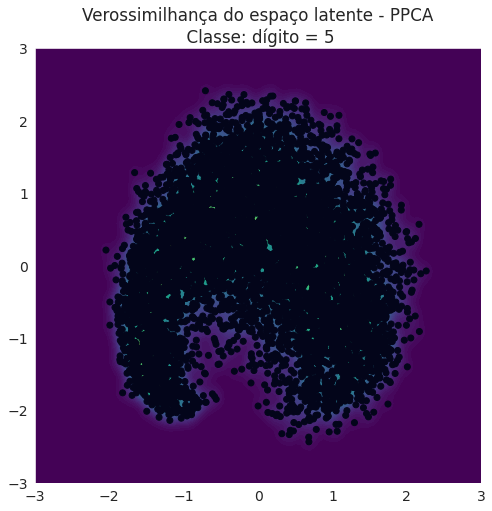

In [ ]:
ppca_2 = PPCA(L=2)
ppca_2.fit(X)

plot_verossimilhanca_espaco_latente(ppca_2, X, cores=y, titulo="Verossimilhança do espaço latente - PPCA\n Classe: dígito = 5")

100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


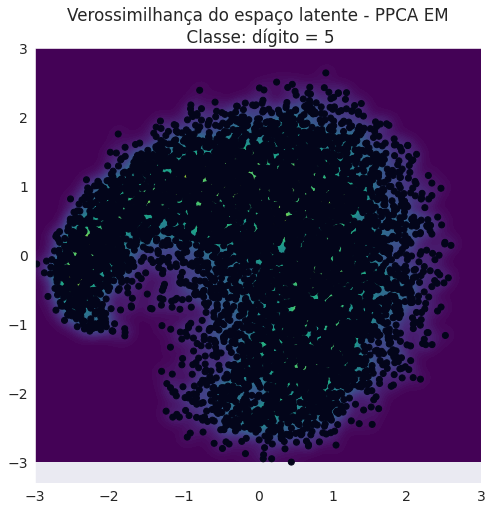

In [ ]:
_, D = X.shape
L=2

ppca_em_2 = PPCAEM(
    L=L,
    W=np.random.normal(0, 0.01, size=(D, L)),
    σ_square=np.median(X.var(axis=0))
)
estatisticas_2 = ppca_em_2.fit(X)

plot_verossimilhanca_espaco_latente(ppca_em_2, X, cores=y, titulo="Verossimilhança do espaço latente - PPCA EM\n Classe: dígito = 5", visualizar_nuvem=True)

### Gráfico: Média e bases principais para modelos treinados com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$

Os gráficos abaixo correspondem a figura 12.6.a) do livro  _The Machine Learning: A Probabilistic Perspective_ de Kevin Murphy. O primeiro elemento corresponde a média do conjunto de dados ($\boldsymbol{X}$). Os elementos seguintes correspondem às _bases principais_, que são as colunas do vetor $\boldsymbol{W}$ aprendidas pelos modelos.

Os gráficos foram obtidos para os modelos treinados anteriormente com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$.

O código reference a implementação está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_figura_murphy_12_6_a(X, modelo, titulo, shape=(28, 28)):
    L = modelo.L
    fig, axes = plt.subplots(1, 1+L, figsize=(4*L, 4), sharex='col', sharey='col')
    axes = axes.flatten()

    axes[0].imshow(modelo.μ.reshape(shape), cmap='gray', interpolation='none')
    for l in range(L):
        w = modelo.W[:, l].reshape(shape)
        axes[l+1].imshow(w, cmap='gray', interpolation='none')

    fig.suptitle(titulo)

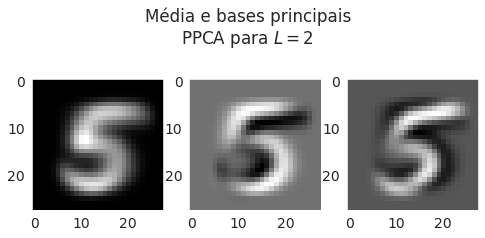

In [ ]:
plot_figura_murphy_12_6_a(X, ppca_2, f'Média e bases principais\nPPCA para $L={2}$')

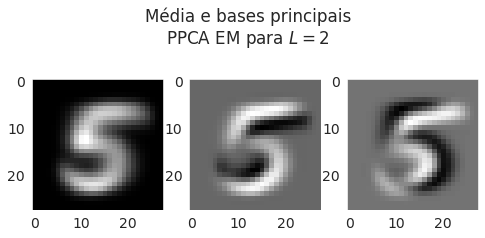

In [ ]:
plot_figura_murphy_12_6_a(X, ppca_em_2, f'Média e bases principais\nPPCA EM para $L={2}$')

### Gráfico: Estatísticas do trenamento do `PPCAEM` treinado com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$

Durante o processo de treinamento para o modelo `PPCAEM` com espaço latente (L=2) para conjunto de dados de `dígitos = 5` do MNIST com $D=28^2$, foram coletadas algumas estatísticas:
* log-likelihood: Log-verossimilhança;
* $\sum μ$: Soma da média dos dados (não muda ao longo do tempo);
* $\sum \boldsymbol{W}$: Soma dos pesos do modelo;
* $\sigma^2$: Variância do modelo;
* $\sum$ 𝔼_zs: $\sum_i^D \mathbb{E}[\boldsymbol{z}_i]$;
* $\sum$ 𝔼_zzTs: $\sum \mathbb{E}[\boldsymbol{z}_i\boldsymbol{z}_i^T] ~ \forall i \in \{1, ..., D\}$;


O código reference a implementação está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_estatisticas(estatisticas, titulo):
    f, axes = plt.subplots(2, 3, squeeze=False, figsize=(25, 8))

    legendas = ['log-likelihood', '$\sum$ μ', '$\sum$ W', '$\sigma^2$', '$\sum$ 𝔼_zs', '$\sum$ 𝔼_zzTs']

    for c, ax, legenda in zip(estatisticas, axes.flatten(), legendas):
        ax.plot(c.flatten(), label=legenda)
        ax.legend(loc='best')
    
    plt.suptitle(titulo)

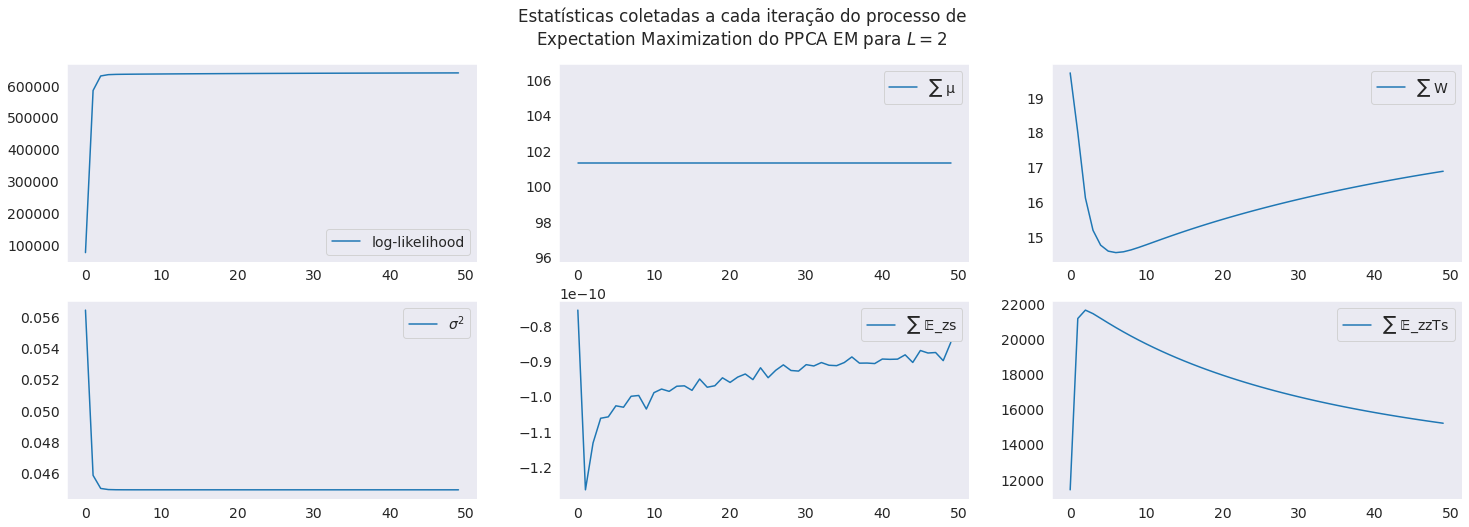

In [ ]:
plot_estatisticas(estatisticas_2, titulo="Estatísticas coletadas a cada iteração do processo de\nExpectation Maximization do PPCA EM para $L={2}$")

### Gráfico: Geração de amostras

A seguir, serão utilizados modelos `PPCAEM` treinados com $L\in \{2, 10, 20\}$ para a tarefa de geração de amostras.
Após a exibição dos modelos, serão feitos comentários sobre as amostras geradas.

O código reference a implementação da da geração de imagens é apresentado a seguir:

In [ ]:
def plot_geracao(modelo, titulo):
    linha, coluna = 5, 5
    total = linha * coluna

    # p(Z)
    μ, Σ = modelo.priori_espaco_latente()
    p_z = multivariate_normal(μ.flatten(), Σ)

    # Z \sim p(Z)
    Z = p_z.rvs(total)
    
    fig, axes = plt.subplots(linha, coluna, figsize=(2*linha, 2*coluna), sharex='col', sharey='col')

    for i, ax in enumerate(axes.flatten()):
        # Passo de reconstrução
        z_i = Z[i].reshape((-1, 1))
        μ_z_i, Σ_z_i = modelo.reconstrucao_probabilistica(z_i)

        ax.imshow(μ_z_i.reshape(-1, 28), cmap='gray', interpolation='none')

    fig.suptitle(titulo)

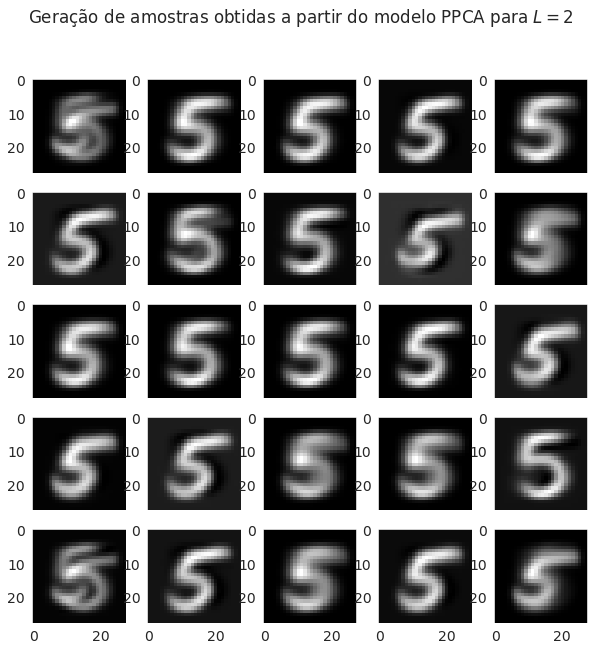

In [ ]:
plot_geracao(ppca_em_2, f'Geração de amostras obtidas a partir do modelo PPCA para $L={2}$')

In [ ]:
_, D = X.shape
L=10

ppca_em_10 = PPCAEM(
    L=L,
    W=np.random.normal(0, 0.01, size=(D, L)),
    σ_square=np.median(X.var(axis=0))
)
estatisticas_10 = ppca_em_10.fit(X)

100%|██████████| 50/50 [01:28<00:00,  1.76s/it]


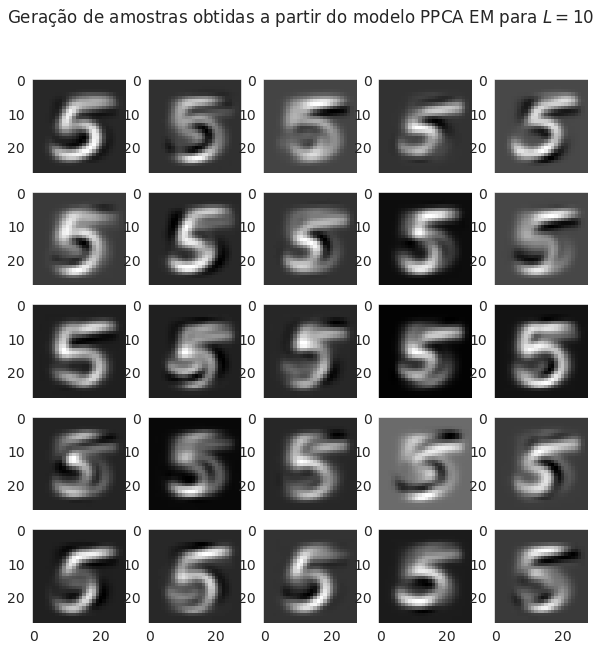

In [ ]:
plot_geracao(ppca_em_10, f'Geração de amostras obtidas a partir do modelo PPCA EM para $L={10}$')

In [ ]:
_, D = X.shape
L=20

ppca_em_20 = PPCAEM(
    L=L,
    W=np.random.normal(0, 0.01, size=(D, L)),
    σ_square=np.median(X.var(axis=0))
)
estatisticas_20 = ppca_em_20.fit(X)

100%|██████████| 50/50 [03:49<00:00,  4.59s/it]


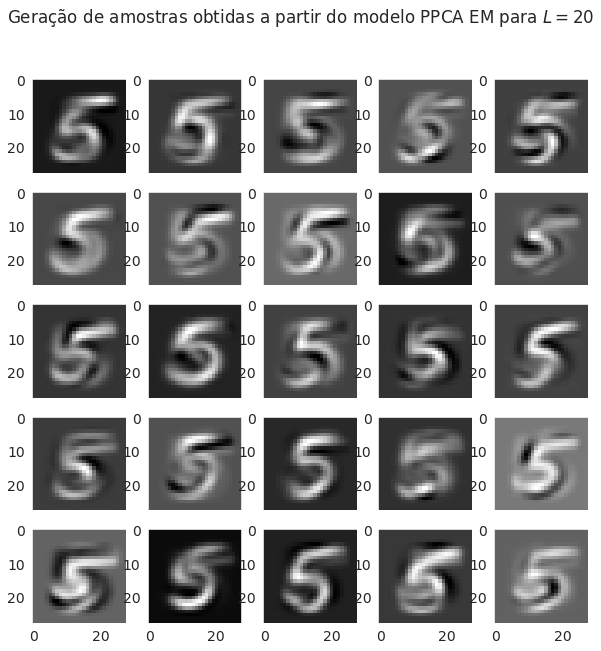

In [ ]:
plot_geracao(ppca_em_20, f'Geração de amostras obtidas a partir do modelo PPCA EM para $L={20}$')

Podemos observar que as imagens amostradas para o modelo treinado com $L=2$ são muito parecidas entre si. Além disso, elas parecem também com a média. Algumas aparentam que existe uma sobreposição de `5` com algum distanciamento entre si.

Para $L=10$, podemos ver uma variabilidade maior dos dígitos gerados. Aparentemente há uma captura de mais características do 5: podemos ver cincos mais inclinados, cincos mais "gordinhos", cincos com a linha de cima mais esticada. Nota-se que apareceram mais cincos com aparente sobreposição de dígitos.

Para $L=20$, podemos ver uma variabilidade ainda maior dos dígitos gerado, com alguns contornos mais definidos. Entretanto, há uma percepção visual de sobreposição de dígitos mais forte, de modo que claramente e facilmente percebe-se que os dígitos não foram feitos por humanos.

### Gráfico: Reconstrução de imagens

A seguir, serão utilizados modelos `PPCAEM` treinados com $L\in \{2, 10, 20\}$ para a tarefa de reconstrução de imagens. A imagem é apresentada da seguinte forma: os dígitos originais correspondem as colunas ímpares, enquanto as reconstruções são os vizinhos a direita e correspondem as colunas pares.

Após a exibição dos modelos, serão feitos comentários sobre as amostras geradas.

O código reference a implementação da da geração de imagens é apresentado a seguir:

In [ ]:
def plot_reconstrucao(modelo, X, titulo, shape=(28, 28)):
    linha, coluna = 5, 5
    total = linha * coluna

    # Projeção linear
    X_original = X[:total]
    μs, Σs = modelo.posterioris(X_original)

    fig, axes = plt.subplots(linha, coluna*2, figsize=(2*coluna*2, 2*linha), sharex='col', sharey='col')

    imagens = []
    for i in range(total):
        x_i = X[i].reshape(shape)

        imagens.append(x_i)

        # Reconstrução
        μ = μs[i].reshape((-1, 1))
        Σ = Σs[i]

        z_i = μ
        μ_z_i, Σ_z_i = modelo.reconstrucao_probabilistica(z_i)

        imagens.append(μ_z_i.reshape(shape))

    for ax, imagem in zip(axes.flatten(), imagens):
        ax.imshow(imagem, cmap='gray', interpolation='none')

    fig.suptitle(titulo)

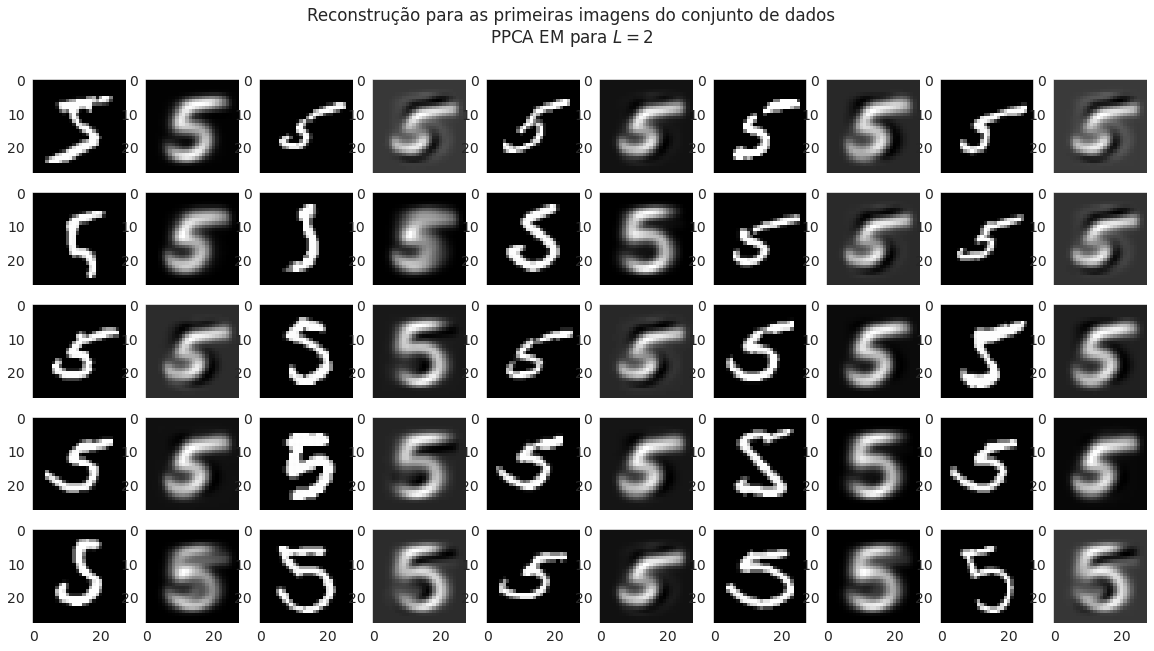

In [ ]:
plot_reconstrucao(ppca_em_2, X, f'Reconstrução para as primeiras imagens do conjunto de dados\nPPCA EM para $L={2}$')

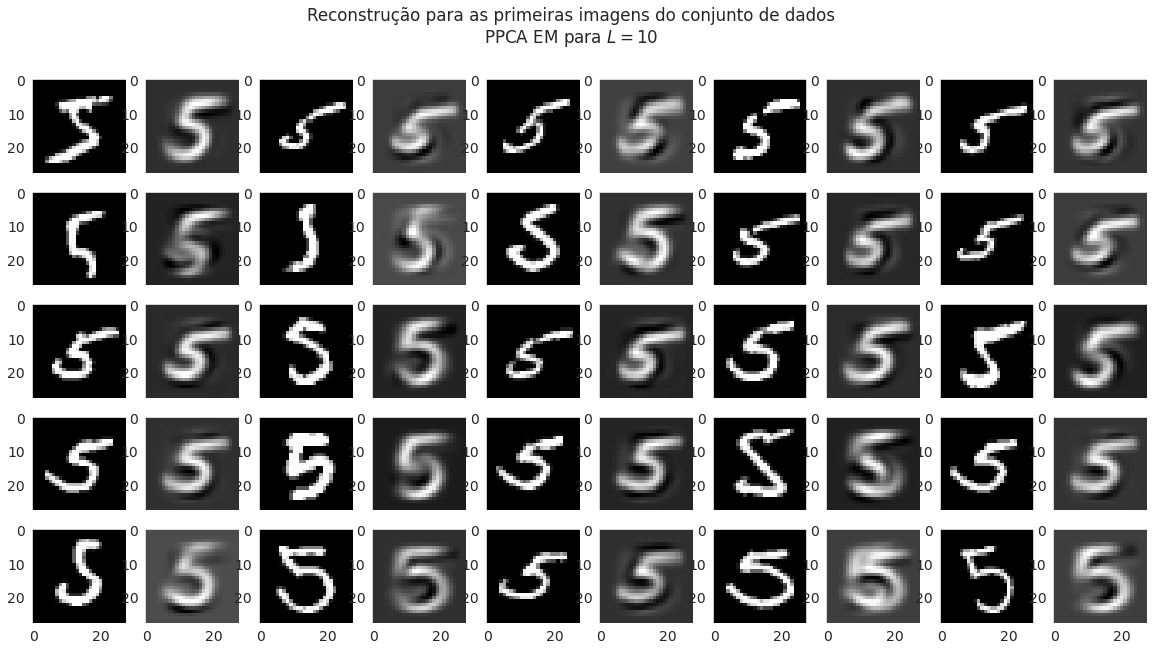

In [ ]:
plot_reconstrucao(ppca_em_10, X, f'Reconstrução para as primeiras imagens do conjunto de dados\nPPCA EM para $L={10}$')

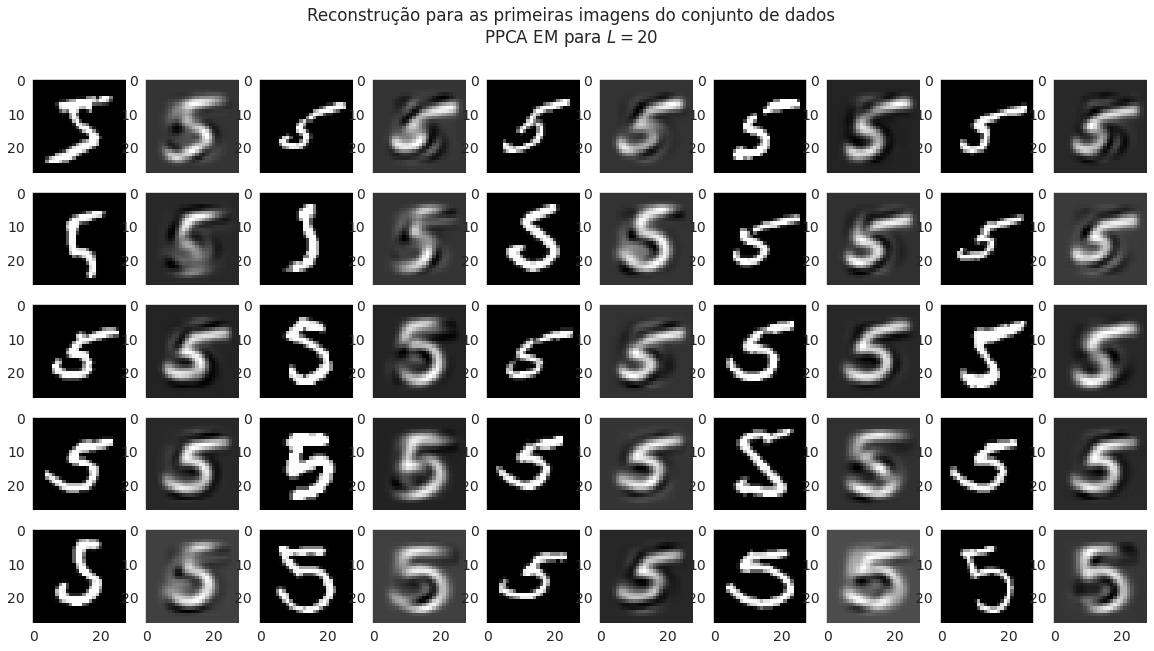

In [ ]:
plot_reconstrucao(ppca_em_20, X, f'Reconstrução para as primeiras imagens do conjunto de dados\nPPCA EM para $L={20}$')

Nota-se que, a medida que as reconstruções ocorrem para modelso com $L$ maior, estas tendem a serem mais fiéis a imagem original. Pecema que para o modelo treinado com $L=2$, todas ss recostruções possuem uma cara muito parecida. A medida que o $L$ aumenta, as reconstruções vão se distanciando da média e se aproximando da imagem original.

Uma reconstrução que gostaria de destacar é a referente a segunda linha primeira coluna. A imagem original deste 5 em particular, considero muito feia. Aparentemente a parte de baixo foi cortada, antes que houvesse a "voltinha" completa. Percema que para $L=2$, a reconstrução apresentou um cinco bastante diferente. Para $L=10$, a "voltinha" está bem borrada, e para $L=20$, a "voltinha" está extremamente borrada.

Uma hipótese para este comportamento é que o modelo com $L=2$ não conseguiu aprender muito as características distintas dos diversos dígitos cinco, de forma que ele generaliza com um cinco com cara padrão de média. A medida que se aumenta a quantidade de bases ($L$), o modelo consegue generalizar mais características dos dígitos 5 apresentados. Para $L=20$, onde o modelo está mais livre das amarras do comportamento médio dos dados, a parte de cima do cinco reconstruído está relativamente similar ao cinco original, entretanto a parte de baixo está bastante borrada, indicando que o modelo não conseguiu generalizar essa forma distinta de cinco, provavelmente pela falta de amostras similares e pela restrição da quantidade de bases utilizada.

### Agradecimentos

Agradeço ao Jordão Memória que ajudou na verificação se o código estava funcionando e ao professor César Lincoln que, além das aulas, nos auxiliou na inicialização do PPCAEM, na decifração do que significava $||\boldsymbol{x}_i - \mu||^2$ (norma segunda ao quadrado, não norma primeira ao quadrado e nem norma segunda sem o quadrado), como também destacou que eu estava utilizando a função de log-verossimilhança errada para verificar se o treinamento estava ocorrendo adequadamente.